# Overview
This file visually showcases the effect of each preprocessings step on the data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from preprocess import sigma_clip, bin_curves, transients

transients

,IAU_name,sector,cam,ccd,discovery_survey,internal_name,classification,redshift,ra,dec,discovery_mag,discovery_date
IAU_name,,,,,,,,,,,,
2021hi,2021hi,33,2,1,ZTF,/ATLAS21aua/ZTF21aabeeas,NaN,NaN,06:01:25.658,-24:35:06.69,/19.735//19.4935/20.1024//19.735/20.1024,2216.794907
2020aedx,2020aedx,33,2,1,Pan-STARRS,/PS20nhd,NaN,NaN,05:54:32.525,-19:26:15.35,/20.59/20.59,2205.931000
2021jt,2021jt,33,2,1,Pan-STARRS,/PS21ad,NaN,NaN,06:05:46.795,-23:19:12.13,/20.88/20.88,2218.917000
2021ju,2021ju,33,2,1,Pan-STARRS,/PS21ae,NaN,NaN,06:00:45.646,-23:15:45.49,/21.06/21.06,2220.885000
2021ph,2021ph,33,3,1,ATLAS,/ATLAS21auh,NaN,NaN,07:11:49.735,-31:52:23.53,/19.363//19.363,2221.934000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019pnp,2019pnp,15,4,3,GaiaAlerts,/Gaia19dxb,NaN,NaN,11:08:23.670,+58:39:39.20,/18.44//18.44,1731.943993
2019oug,2019oug,15,1,1,GaiaAlerts,/Gaia19dte,NaN,NaN,21:07:53.550,+47:45:22.43,/18.82//18.82,1718.478993
2019nud,2019nud,15,1,1,Padova-Asiago,/ZTF19abqbzal,/SN II,/0.038974,21:38:33.620,+44:09:32.61,//16.7241/16.7241,1713.674826


In [3]:
light_curves = os.listdir("./TESS_data/light_curves_fausnaugh")
# name = light_curves[random.randint(0, len(light_curves)-1)]
# print(light_curves[i])
filename = "lc_2021yyh_cleaned"
curve = pd.read_csv("./TESS_data/light_curves_fausnaugh/" + filename, delim_whitespace=True)

#read AT_count file to find nonlight curve data of transient
curve_name = filename.split("_")[1]
curve_meta = transients[transients['IAU'] == curve_name]
display(curve_meta)

,sector,ra,dec,mag,TJD_discovery,type,class,IAU,survey,cam,ccd,col,row
3745,42,12.378704,15.537911,19.45,2468.92532,AT,Unclassified,2021yyh,AMPEL,3,1,618.416,541.013


In [4]:
curve['relative_time'] = curve['TJD'] - curve_meta['discovery_date'].iloc[0]
curve.index = pd.TimedeltaIndex(curve['relative_time'], unit="D")
plot_title = f"{curve_name}\n Class: {curve_meta['classification'].iloc[0]}, Sector: {curve_meta['sector'].iloc[0]} \nCoords:{curve_meta['ra'].iloc[0], curve_meta['dec'].iloc[0]}, \nDiscovery TJD: {curve_meta['discovery_date'].iloc[0]}, Survey: {curve_meta['discovery_survey'].iloc[0]}"

def display_curve(col, error, title=""):
    return curve.plot.scatter(x="relative_time", y=col, c="00000", alpha=0.5, yerr=curve[error], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title + title)

# Preprocessing steps
## 1. Sigma Clipping: remove points with flux uncertainties more than 3 sigma from mean uncertainty, repeat clipping 5 times,

<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL'}, xlabel='Days relative to discovery', ylabel='Flux'>

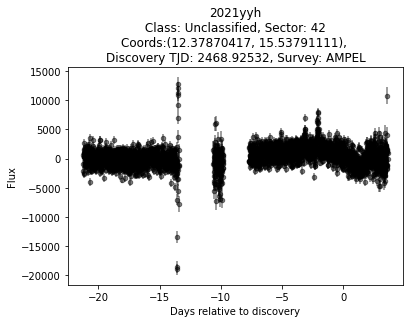

In [5]:
curve = sigma_clip(curve, "e_cts")

display_curve("cts", "e_cts")

In [6]:
curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time
relative_time,,,,,,,,,
-22 days +18:17:42.720000,2447.69481,2447.68762,-990.8371,684.1254,-858.0303,176.2976,1193.7770,684.1254,-21.23770
-22 days +18:27:42.336000,2447.70176,2447.69456,-2072.8108,684.2543,-154.2712,176.2976,-790.2505,684.2543,-21.23076
-22 days +18:37:42.816000,2447.70870,2447.70151,627.2037,685.1457,-1100.8588,176.2976,550.8918,685.1457,-21.22381
-22 days +18:47:42.432000,2447.71565,2447.70845,952.8441,685.2900,-263.7252,176.2976,625.3451,685.2900,-21.21687
-22 days +18:57:42.912000,2447.72259,2447.71540,-2513.9362,684.6800,-342.1961,176.2976,-558.5519,684.6800,-21.20992
...,...,...,...,...,...,...,...,...,...
3 days 14:47:42.144000,2472.55039,2472.54178,10754.1760,1476.2821,-204283.2155,-463.3181,3097.7400,1476.2821,3.61646
3 days 14:57:41.759999999,2472.55733,2472.54872,-1142.7296,1493.6291,-206574.6541,-463.3181,63.5746,1493.6291,3.62340
3 days 15:07:41.376000,2472.56427,2472.55566,3961.1076,1513.0710,-213265.7869,-718.9103,1372.1005,1513.0710,3.63034


## 2. Subtract background Flux, apply cts sigma clipping

<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL'}, xlabel='Days relative to discovery', ylabel='Flux'>

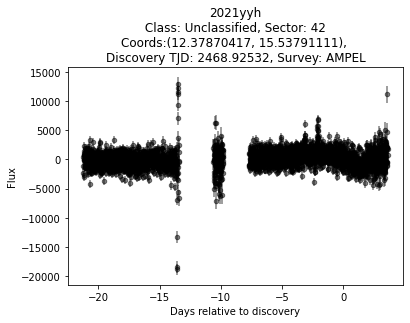

In [7]:
curve['no_bkg_cts'] = curve['cts'] - curve['bkg_model']
display_curve('no_bkg_cts', "e_cts")

<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL'}, xlabel='Days relative to discovery', ylabel='Flux'>

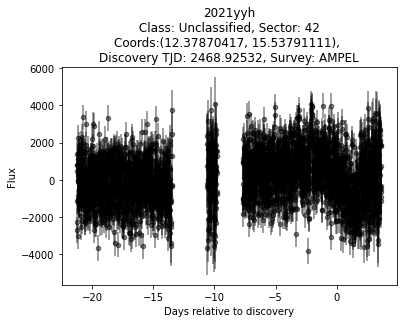

In [8]:
for _ in range(0, 5):
    cts_mean = curve.no_bkg_cts.mean()
    cts_threshold = 3*curve.no_bkg_cts.std()
    curve = curve[np.abs(curve['no_bkg_cts'] - cts_mean) <= cts_threshold]

display_curve('no_bkg_cts', "e_cts")

## 3. Correct for milky way extinction using Fitzpatrick Reddening function
Wavelength of TESS bandpass is between 600-1000nm, central wavelength is 786.5nm

<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL\nmwebw:0.059'}, xlabel='Days relative to discovery', ylabel='Flux'>

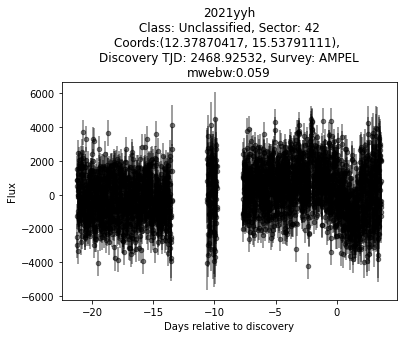

In [9]:
import extinction
from astroquery.ipac.irsa.irsa_dust import IrsaDust
import astropy.coordinates as coord
import astropy.units as u

# Set relevant parameters
ra = curve_meta["ra"].iloc[0]
dec = curve_meta["dec"].iloc[0]
flux_in = curve['no_bkg_cts']
fluxerr_in = curve["e_cts"]
bandpass_wavelengths = np.array([7865,])

# Get Milky Way E(B-V) Extinction
coo = coord.SkyCoord(ra * u.deg, dec * u.deg, frame='icrs')
dust = IrsaDust.get_query_table(coo, section='ebv')
mwebv = dust['ext SandF mean'][0]


# Remove extinction from light curves (Using negative a_v so that extinction.apply works in reverse and removes the extinction)
extinction_per_passband = extinction.fitzpatrick99(wave=bandpass_wavelengths, a_v=-3.1 * mwebv, r_v=3.1, unit='aa')
flux_out = extinction.apply(extinction_per_passband[0], flux_in, inplace=False)
fluxerr_out = extinction.apply(extinction_per_passband[0], fluxerr_in, inplace=False)

curve['unreddened_cts'] = flux_out
curve['unreddened_ects'] = fluxerr_out

display_curve('unreddened_cts', 'unreddened_ects', f"\nmwebw:{mwebv}")

In [10]:
#display all data
curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time,no_bkg_cts,unreddened_cts,unreddened_ects
relative_time,,,,,,,,,,,,
-22 days +18:17:42.720000,2447.69481,2447.68762,-990.8371,684.1254,-858.0303,176.2976,1193.7770,684.1254,-21.23770,-1167.1347,-1284.614906,752.987369
-22 days +18:27:42.336000,2447.70176,2447.69456,-2072.8108,684.2543,-154.2712,176.2976,-790.2505,684.2543,-21.23076,-2249.1084,-2475.496767,753.129243
-22 days +18:37:42.816000,2447.70870,2447.70151,627.2037,685.1457,-1100.8588,176.2976,550.8918,685.1457,-21.22381,450.9061,496.292928,754.110369
-22 days +18:47:42.432000,2447.71565,2447.70845,952.8441,685.2900,-263.7252,176.2976,625.3451,685.2900,-21.21687,776.5465,854.711294,754.269194
-22 days +18:57:42.912000,2447.72259,2447.71540,-2513.9362,684.6800,-342.1961,176.2976,-558.5519,684.6800,-21.20992,-2690.2338,-2961.024499,753.597793
...,...,...,...,...,...,...,...,...,...,...,...,...
3 days 14:27:42.048000,2472.53650,2472.52789,-1646.3922,1442.2952,-188503.4054,-718.9103,-451.0707,1442.2952,3.60257,-927.4819,-1020.839389,1587.472220
3 days 14:37:41.664000,2472.54344,2472.53483,-1076.7975,1455.5430,-199128.9654,-718.9103,-1374.0809,1455.5430,3.60951,-357.8872,-393.911030,1602.053503
3 days 14:57:41.759999999,2472.55733,2472.54872,-1142.7296,1493.6291,-206574.6541,-463.3181,63.5746,1493.6291,3.62340,-679.4115,-747.798982,1643.973233


## 4. Normalize

<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL'}, xlabel='Days relative to discovery', ylabel='Flux'>

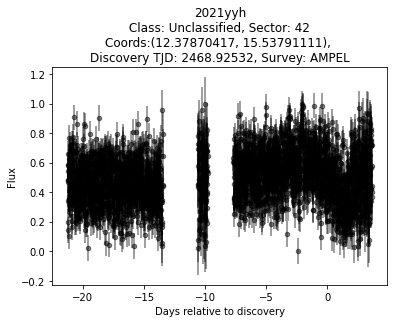

In [11]:
curve['normalized_cts'] = (curve.unreddened_cts - curve.unreddened_cts.min()) / (curve.unreddened_cts.max()-curve.unreddened_cts.min())
curve['normalized_ects'] = curve['unreddened_ects'] / (curve.unreddened_cts.max()-curve.unreddened_cts.min())
# curve.plot.scatter(x="BTJD", y='normalized_cts', c="00000", alpha=0.5, ylabel="Flux", xlabel="Barycentric TESS Julian Date")
display_curve('normalized_cts', 'normalized_ects')

## 5. Bin Data
bins the data into 1 day intervals and takes the mean of each bin

In [12]:
#square e_cts to get variances
binned = bin_curves(curve, "0.5D")
binned = binned.fillna(0)
binned

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time,no_bkg_cts,unreddened_cts,unreddened_ects,normalized_cts,normalized_ects
relative_time,,,,,,,,,,,,,,
-42.0,2447.937885,2447.930675,107.945358,683.931312,-234.908090,175.674201,182.062717,683.930693,-20.994645,-67.728844,-74.546222,752.773063,0.475232,0.086270
-41.0,2448.437531,2448.430284,-153.348663,682.181706,-72.622941,194.895915,227.766325,682.181515,-20.495036,-348.244579,-383.297812,750.847819,0.439848,0.086050
-40.0,2448.934486,2448.927203,-62.823954,682.236773,121.945761,159.641507,201.083403,682.236560,-19.998117,-222.465461,-244.858153,750.908403,0.455714,0.086057
-39.0,2449.434522,2449.427203,106.227647,682.585736,201.890883,308.465681,258.680769,682.585519,-19.498117,-202.238033,-222.594695,751.292488,0.458265,0.086101
-38.0,2449.934557,2449.927203,-239.233297,683.249636,149.452006,111.178297,90.830682,683.249524,-18.998117,-350.411594,-385.682953,752.023329,0.439575,0.086185
-37.0,2450.434592,2450.427203,-211.758047,683.472365,175.753246,-37.494978,54.043157,683.472096,-18.498117,-174.263069,-191.803857,752.268305,0.461794,0.086213
-36.0,2450.934626,2450.927203,-282.433767,684.538542,86.814943,-82.802465,-14.357442,684.538211,-17.998117,-199.631301,-219.725577,753.441732,0.458594,0.086347
-35.0,2451.433045,2451.425587,-293.711075,685.119104,41.904300,23.450658,28.383194,685.118965,-17.499733,-317.161732,-349.086262,754.080943,0.443769,0.086420
-34.0,2451.934692,2451.927201,-251.928742,685.861857,104.741339,140.969871,116.894728,685.861386,-16.998119,-392.898613,-432.446584,754.898094,0.434216,0.086514


<AxesSubplot:title={'center':'2021yyh\n Class: Unclassified, Sector: 42 \nCoords:(12.37870417, 15.53791111), \nDiscovery TJD: 2468.92532, Survey: AMPEL'}, xlabel='Days relative to discovery', ylabel='Flux'>

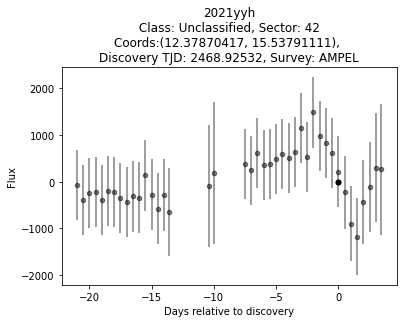

In [13]:
binned.plot.scatter(x="relative_time", y='unreddened_cts', c="00000", alpha=0.5, yerr=binned['unreddened_ects'], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title)

# Find training labels
## 1. Max Light

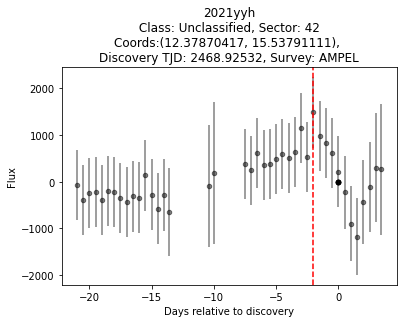

In [14]:
id_max = binned['unreddened_cts'].idxmax()
max_data = binned.loc[id_max, :]
t_max = max_data['relative_time']

ax = binned.plot.scatter(x="relative_time", y='unreddened_cts', c="00000", alpha=0.5, yerr=binned['unreddened_ects'], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title)
ax.axvline(t_max, color="red", linestyle="--")

In [8]:
import os
import matplotlib.pyplot as plt
from preprocess import display_curve, format_title, preprocess_tess
import warnings
import json
import pandas as pd

labels = pd.read_csv("./TESS_data/curve_labels.csv")
labels

light_curves = os.listdir("./TESS_data/ztf_data")
save_dir="./TESS_data/tess_unprocessed_plots/"
not_found = []
saved = []
# xlim = [-30,30]
params = {
        "norm": False,
        "to_bin": False,
        "bin_interval": "0.5D",
        "time_scale": "trigger",
        "sub_bg_model": False,
        "convert_to_mag": False,
        "remove_extinction": True
    }

def save_tess_plot(filename):
    tess_curve_name = filename.split("_")[0]

    tess_file_name = f'lc_{tess_curve_name}_cleaned'
    params['to_bin'] = False
    df, meta = preprocess_tess(tess_file_name, params)
    if df is not None:
        fig, ax = plt.subplots()
        display_curve(df, meta, "cts", "e_cts", ax=ax, is_mag=False, alpha=0.2)
        params['to_bin'] = True

        df1, meta = preprocess_tess(tess_file_name, params)
        df1.index /= 2
        display_curve(df1, meta, "cts", "e_cts", ax=ax, is_mag=False, alpha=1.0, color="blue", max_color="blue", label="binned")

        ax.set_title(format_title(meta))
        # ax.set_xlim(xlim)
        fig.savefig(save_dir + tess_curve_name, bbox_inches="tight")
        saved.append(tess_curve_name)
        plt.close(fig)
        return df, df1
    else:
        not_found.append(tess_curve_name)
#
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     for filename in light_curves:
#         save_tess_plot(filename)
#         print(filename)
#     print(not_found)

df, df1 = save_tess_plot("2019tka")

In [6]:
with open("./TESS_data/curve_names.json", "w") as file:
    json.dump(saved, file)

,curve_name,tess_maybe,tess_good,tess_great,tess_peak
0,2018fzi,NaN,True,NaN,NaN
1,2018gku,NaN,NaN,NaN,NaN
2,2018grv,NaN,True,NaN,NaN
3,2018gxi,NaN,True,NaN,NaN
4,2018hgl,NaN,True,NaN,NaN
...,...,...,...,...,...
1908,2022oz,NaN,NaN,NaN,NaN
1909,2022qs,NaN,NaN,NaN,NaN
1910,2022Q,NaN,NaN,NaN,NaN
1911,2022re,NaN,True,NaN,True


In [52]:
df = labels[(labels["tess_good"]) | (labels["tess_great"] == True)]["curve_name"]
for name in df:
    print(name)

2018fzi
2018grv
2018gxi
2018hgl
2018hkb
2018hxq
2018hyy
2018itr
2018iyh
2018iyx
2018izg
2018jeb
2018jjs
2018jnd
2018jwh
2018koy
2018kvc
2018lab
2018lml
2019aba
2019bip
2019cxt
2019dhz
2019dke
2019dsn
2019fp
2019mdw
2019nvk
2019nvl
2019oba
2019ook
2019osp
2019pdx
2019pny
2019prm
2019prs
2019ptf
2019qhh
2019qmt
2019qqr
2019rrc
2019ruc
2019ruf
2019rvx
2019soh
2019tfa
2019tjz
2019uen
2019uge
2019ugr
2019ujw
2019ulr
2019ulw
2019uyn
2019vli
2019vlu
2019vyj
2019wjl
2019wla
2019wle
2019wz
2019xaq
2019xul
2019zam
2019zes
2019zsi
2020aan
2020aarw
2020aatb
2020aauh
2020aawh
2020abqy
2020abq
2020abvc
2020abxl
2020acbc
2020acdk
2020adff
2020adw
2020aek
2020ayw
2020bew
2020biz
2020bjj
2020bob
2020buv
2020bw
2020bza
2020bzd
2020bzv
2020cc
2020cdj
2020chi
2020clr
2020cmv
2020csx
2020cxe
2020dgc
2020dts
2020eee
2020fcw
2020flg
2020hdw
2020ht
2020hu
2020hye
2020hyh
2020jjk
2020kq
2020kt
2020kzp
2020kzr
2020lls
2020mga
2020M
2020nle
2020nxh
2020rub
2020tap
2020ut
2020vbs
2020yef
2020yvf
2020yzv
2020yzw
2